<a href="https://colab.research.google.com/github/rajnish80130/house-price-prediction/blob/main/house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## House Price Prediction Using Linear Regression

# Linear Regression:
        Y = mX + b (y=Dependent variable, m = slope, X = Independent Variable, b = Intercept of y)

**Steps We Do:**

1.Data Loading

2.Data Preprocessing

3.Data Analysis

4.Train Test Split

5.LR Model Fit & Prediction

6.Model Evaluation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn.datasets
from sklearn import metrics

In [7]:
house_price = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/refs/heads/master/BostonHousing.csv')

In [8]:
house_price

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [9]:
df = house_price.copy()

In [11]:
df.shape

(506, 14)

In [13]:
df['price'] = df['medv']

In [15]:
df = df.drop('medv',axis = 1)

In [16]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [18]:
df.isnull().sum()

,0
crim,0
zn,0
indus,0
chas,0
nox,0
rm,0
age,0
dis,0
rad,0
tax,0


<Axes: >

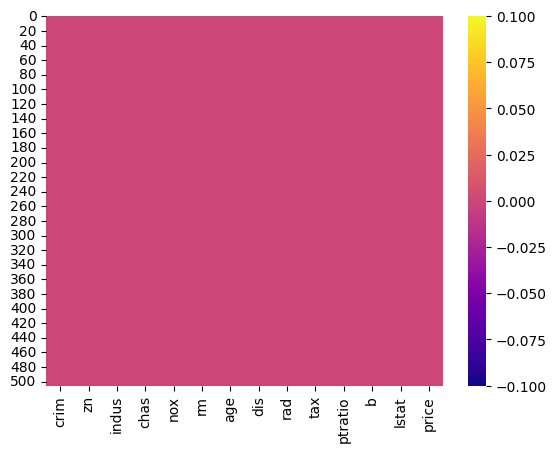

In [21]:
sns.heatmap(df.isna(),cmap='plasma')  #no any null values in this datasets

In [22]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Correlation bw features of our datastes

**1. positive corr: (if one feature increases then the other also increases)**

**2. negative corr: (if one feature decreases then the other also decreases)**

In [24]:
correlation = df.corr()  #checking correlation

<Axes: >

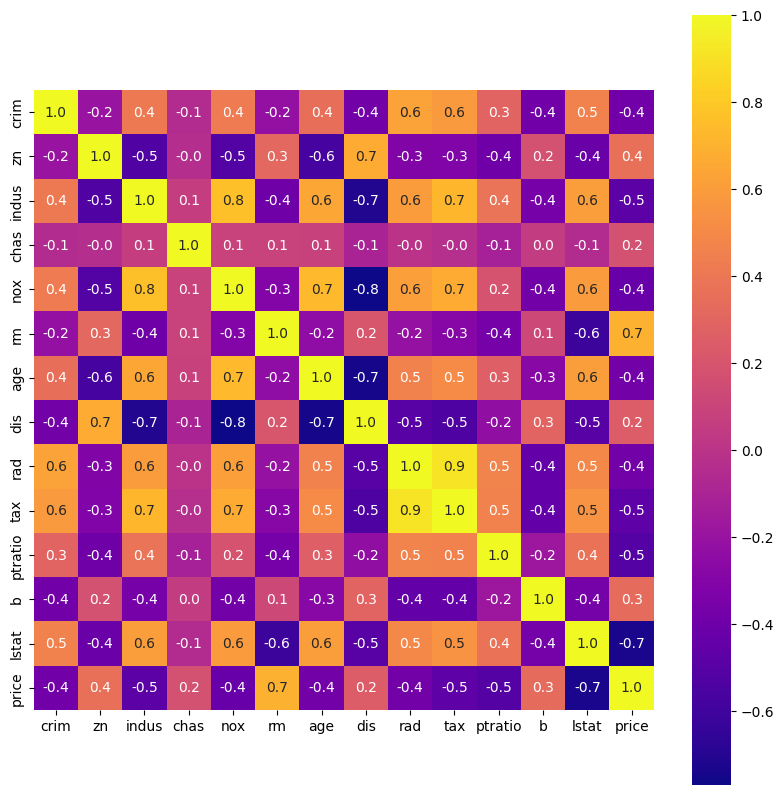

In [26]:
plt.figure(figsize=(10,10))  # 10 by 10 inches
sns.heatmap(correlation,cbar=True,fmt='.1f',annot=True,annot_kws={'size':10}, square=True,cmap="plasma")

In [31]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [27]:
#spitting data
X = df.drop('price',axis=1) #all independent variables
y = df['price'] #dependent variables

In [30]:
print(X)
print(y)

        crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     ptratio       b  lstat  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       17.8  392.83   4.03  
3  

In [33]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [34]:
print(X_train.shape)
print(X_test.shape)

(404, 13)
(102, 13)


In [36]:
#model training

lr = LinearRegression()

lr.fit(X_train,y_train)

LinearRegression()

In [40]:
#predict the price

predicted_price = lr.predict(X_train)

In [41]:
predicted_price

array([25.01156658, 23.20086342, 19.63206629, 30.79723661, 13.29598163,
       12.35655178, 21.17619058, 11.52105413, 13.48284934, 23.29619143,
       16.67181245, 11.9640623 , 32.53526883, 25.38737924, 29.80188665,
       19.51269487, 24.14966495, 24.10079632, 30.6933436 , 19.14366521,
       33.53309203,  3.93459665, 41.11203484, 24.48533152, 20.09948308,
       23.54618062, 21.50057915, 25.02443747, 22.39275602, 33.67942244,
       25.49286716,  8.07877994, 17.45164918, 10.02711469, 20.30483806,
       12.97802751, 18.36662544, 25.4320083 , 14.00655745, 17.89557148,
       24.77620977, 28.90131112, 17.27439484, 23.1865498 , 12.62489379,
       11.32274928, 27.4978866 , 19.49269776, 44.80229099, 16.9529603 ,
       22.44602306, 33.66680303, 20.2706101 , 20.70205114, 20.98558754,
       21.63228494, 27.05322369, 33.11940621, 25.61757987, 32.73314444,
       20.91920151, 41.11899411, 15.32086807,  8.42394611, 22.84480968,
       13.72210624, 28.60744627, 17.09291577, 26.76454185, 39.14

In [44]:
#Evaluate the model
score1 = metrics.mean_absolute_error(y_train,predicted_price)
score2 = metrics.mean_squared_error(y_train,predicted_price)
score3 = np.sqrt(metrics.mean_squared_error(y_train,predicted_price))
print(score1)
print(score2)
print(score3)

3.3844575399167973
22.953693576112883
4.791001312472465


Text(0, 0.5, 'Predicted Price:')

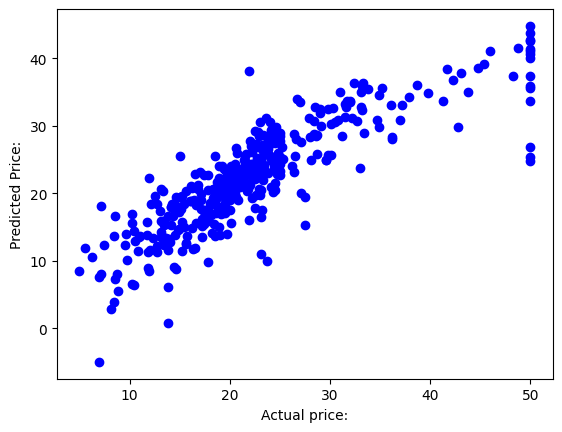

In [49]:
plt.scatter(y_train,predicted_price,color='b')
plt.xlabel('Actual price:')
plt.ylabel('Predicted Price:')

In [51]:
#predicting the tesing data
predicted_price = lr.predict(X_test)
predicted_price

array([23.01506153, 21.2115869 , 33.71590384, 31.56542369,  3.1826268 ,
        3.15381954, 27.40305304, 22.2126176 , 14.86506114, 21.34105453,
       30.95942941, 26.70065029, 21.12624382, 18.37282564, 17.64315354,
       25.38194186, 24.42970445, 13.36957057,  8.66686786, 18.57490534,
       21.73966467, 20.34270529, 36.5461105 , 20.59627495, 19.87979627,
       15.75766967, 37.11632999, 34.85897895, 30.83458635, 23.23441285,
       18.68278505, 20.749546  , 31.84560076, 30.20214207, 13.3861702 ,
       15.87078398, 13.70766096, 23.74163998, 25.95135088, 23.18325878,
       28.99906539, 12.50341936, 31.08347911,  6.39401895, 23.71801218,
       20.61523929, 33.15362417, 19.21862493, 35.89603081,  0.82365329,
       31.90288611, 31.69640543,  6.58849712, 34.62762996, 20.41162545,
       19.69277608, 19.53445865, 18.58689088, 15.81420496, 22.98764309,
       19.65947045, 16.36377019, 18.48783369, 32.76568172, 35.49022568,
       24.58349631, 41.5854766 , 32.94818456, 14.60990256, 27.43

In [53]:
#Evaluate the test data model
score1 = metrics.mean_absolute_error(y_test,predicted_price)
score2 = metrics.mean_squared_error(y_test,predicted_price)
score3 = np.sqrt(metrics.mean_squared_error(y_test,predicted_price))
print(score1)
print(score2)
print(score3)

3.1130437468934384
18.49542012244846
4.300630200615773


Text(0, 0.5, 'Predicted Price:')

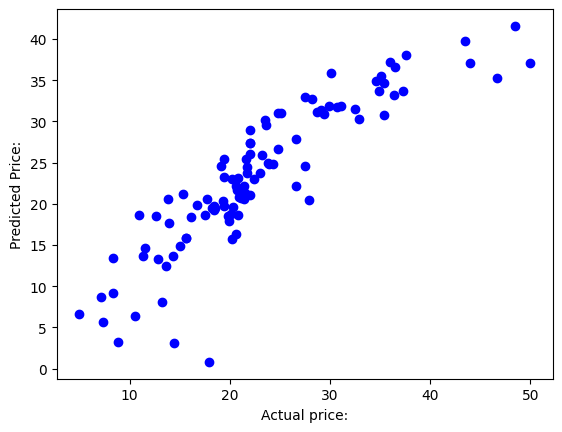

In [54]:
plt.scatter(y_test,predicted_price,color='b')
plt.xlabel('Actual price:')
plt.ylabel('Predicted Price:')

# Our model is predicting not good so our model is very bad